In [17]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
pd.set_option('display.max_rows',None)


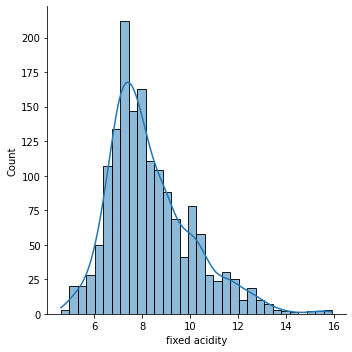

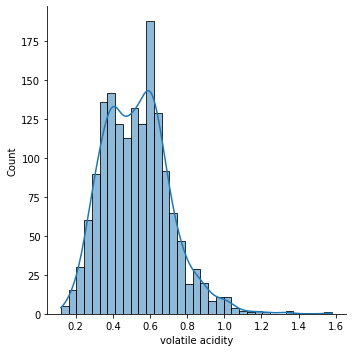

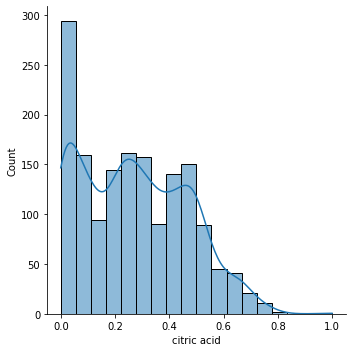

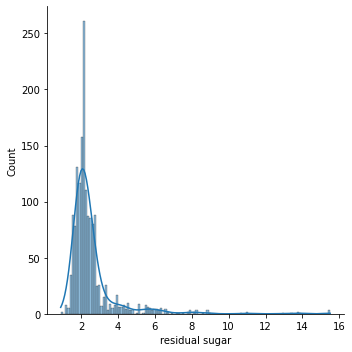

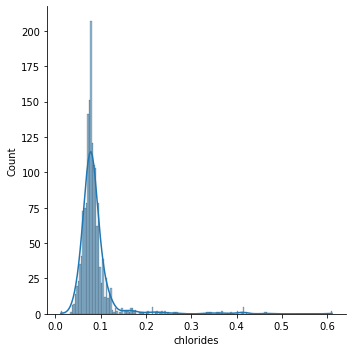

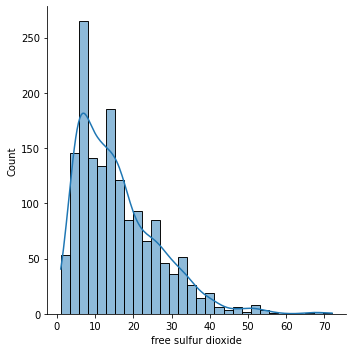

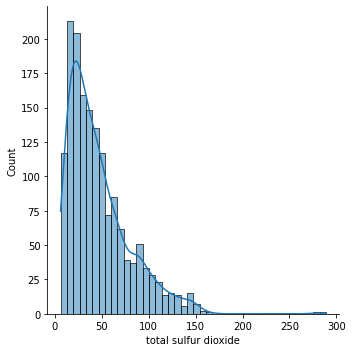

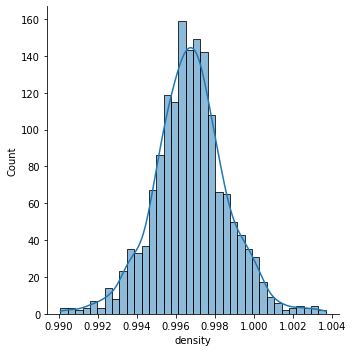

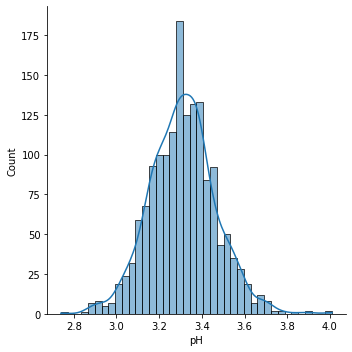

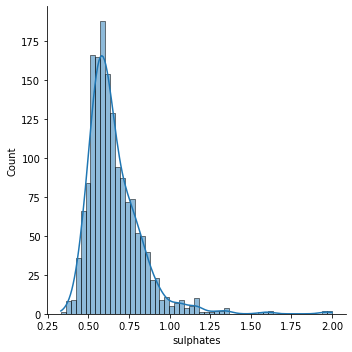

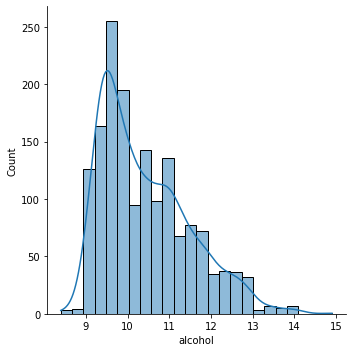

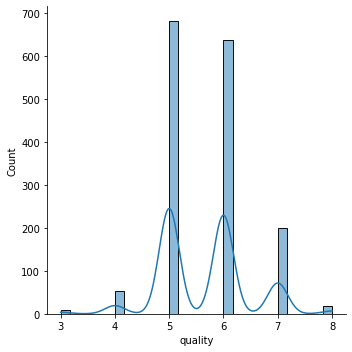

In [11]:
# fixed acidity是酒中非揮發性酸性物質含量，volatile acidity為揮發性酸性物質含量，citric acid檸檬酸含量，residual sugar發酵後剩餘糖含量
#chlorides為酒中含鹽量，free sulfur dioxide游離態二氧化硫含量，total sulfur dioxide為所有型態的二氧化硫含量，density密度，ph酸鹼度
#sulphates硫酸鹽濃度，alcohol酒精濃度，quality品質

import matplotlib.pyplot as plt
import seaborn as sns

for i in df.iloc[:]:
     data = df[i]
     sns.displot(data, kde = True)
     plt.show()
        
#在資料庫中，大部分酒的fixed acidity集中於6~8之間，其中以7.x最多，volatile acidity的分佈變化雖然也有集中的部分，但變化是比較大的，可以
#考慮到這部份原料具有揮發性，所以其資料變化較大也很正常，但主要還是集中在大約0.3~0.7之間，值得注意的是此指標較高實，紅酒味道會偏酸澀，
#檸檬酸含量主要集中在較低含量部分，由於檸檬酸會讓酒類有清新的味道，由此可以這批酒的味道會比較醇厚，剩餘糖含量高度集中在2，代表發酵代謝對糖
#類利用的最大極限，含鹽量高度集中則代表此含鹽環境是對酵母菌而言最好之環境，游離態二氧化硫含量則集中在5~15的區間，這意味著在平衡後其含量在此
#區間浮動，所有型態的二氧化硫含量集中在約25以下，意味著在平衡後期含量變化穩定，密度則是集中於0.996~0.998間<可想見由於溶於水，且其他物質
#含量變化較少，因此密度也集中於此範圍，ph值則集中於3.3左右，硫酸鹽濃度集中在0.5~0.75間，酒精濃度則集中在9~10之間，這也是自然發酵下的極限
#最後大部分酒的品質在5跟6

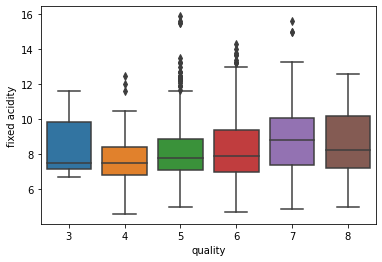

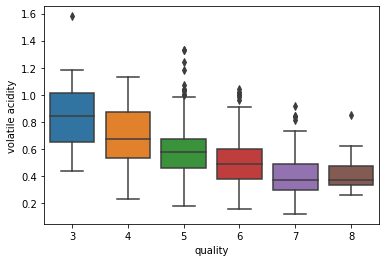

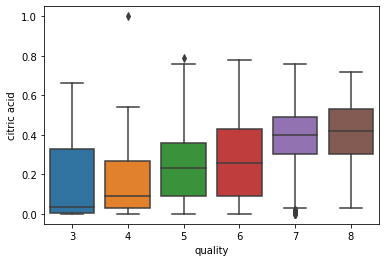

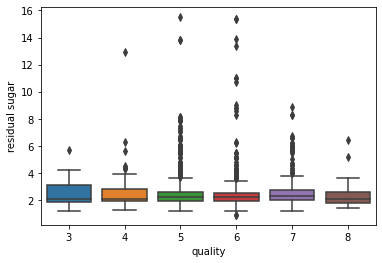

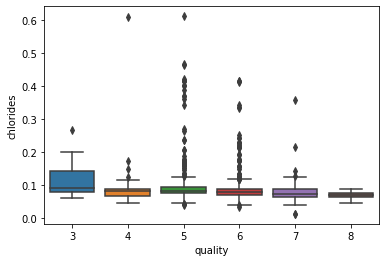

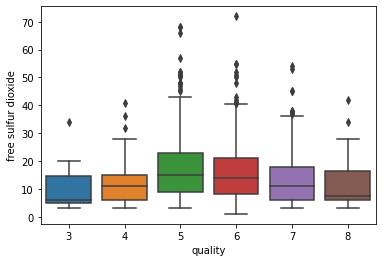

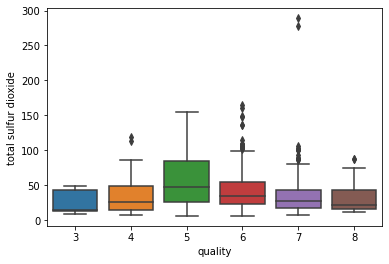

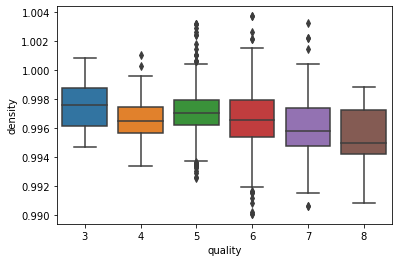

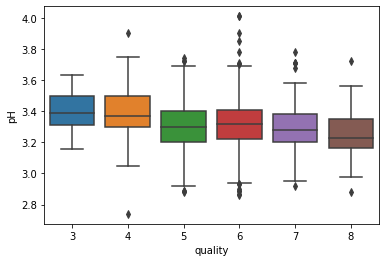

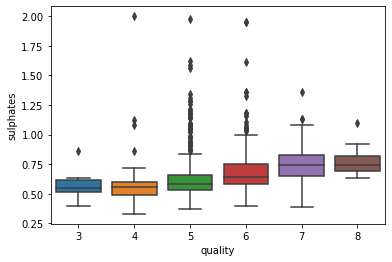

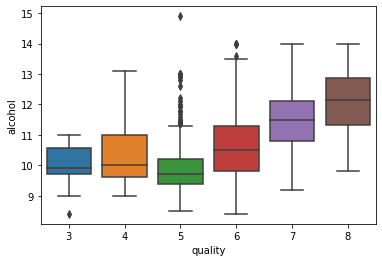

In [14]:
#由結果得知跟品質最相關的指標可能是volatile acidity，因為該指標最大值與平均越高，其酒的品質越低，其次檸檬酸的平均值越高，則酒類品質越高，
#鹽類雖然平均值不影響品質，但是鹽類濃度變化越少，酒的品質越好，此外硫酸鹽濃度越高品質越好，最後酒精濃度越高品質越好，總結下來就是成分變化越少
#，越不酸跟越清爽，及酒精度越高越好

import matplotlib.pyplot as plt
import seaborn as sns
oc = df.columns.drop('quality')
for i in oc:
     sns.boxplot(data = df, x = 'quality',y = i )
     plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df_train = df

X = df_train.drop('quality', axis = 1)
y = df_train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)
#正常而言需要先做資料前處理，但本次的資料沒有非數值資料，亦沒有缺失值，因此可以直接分析

[0.66796875 0.6953125  0.65234375 0.6953125  0.74901961]
